# ArrayList Excecise


### Ex1：挖雷游戏

我们来写一个小程序：

<img src="image/mine.jpg" width="200"/> 

程序接收三个参数，M，N和p，然后生成一个M * N的矩阵，然后每一个cell有p的概率是地雷。生成矩阵后，再计算出每一个cell周围地雷的数量。

In [30]:
import random

In [35]:
def minersweep(m,n,p):
    #create a board
    #initialization
    board= [[None]* (n+2) for i in range(m+2)]
    
    for i in range(1,m+1):
        for j in range(1,n+1):
            r=random.random()
            board[i][j]=-1 if r<p else 0
    #create a another board denoted by '*', '.'
    for i in range(1,m+1):
        for j in range(1,n+1):
            print('*',end=' ') if board[i][j]==-1 else print('.',end=' ')
        print()
        
        
    #caculating the number of bombs around the target cell
    for i in range(1,m+1):
        for j in range(1,n+1):
            if (board[i][j]!=-1):
                #3*3 matrix
                for ii in range(i-1,i+2):
                    for jj in range(j-1,j+2):
                        if (board[ii][jj]==-1):
                            board[i][j]= board[i][j]+1
                            
                            
    print()
                            
    #merge
    for i in range(1,m+1):
        for j in range(1,n+1):
            print('*',end=' ') if board[i][j]==-1 else print(board[i][j], end=' ')
        print()    

In [36]:
minersweep(5,10,0.5)

* * . . . . * . * * 
. * . . * * * * . . 
* . . * . * * . * . 
* . * . . . . * * * 
. . . * * * . . * . 

* * 2 1 2 4 * 4 * * 
4 * 3 2 * * * * 4 3 
* 4 3 * 4 * * 6 * 3 
* 3 * 4 5 4 4 * * * 
1 2 2 * * * 2 3 * 3 


### Ex2：矩阵0变换
给一个m×n的矩阵，如果有一个元素为0，则把该元素对应的行与列所有元素全部变成0。


In [94]:
def zero2(matrix):
    m = [None] * len(matrix)
    n = [None] * len(matrix[0])
    
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (matrix[i][j] == 0):
                m[i] = 1
                n[j] = 1
                
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (m[i] == 1 or n[j] == 1):
                matrix[i][j] = 0

In [95]:
zero2(matrix)
for x in matrix:
    print(x, sep=" ")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]


**space complexity :** m+n

### Ex3：数独
<img src="image/sudoku.jpg" width="200"/> 
给一个填好的数独，验证是否正确。

In [107]:
matrix = [
    [5,3,4,6,7,8,9,1,2],
    [6,7,2,1,9,5,3,4,8],
    [1,9,8,3,4,2,5,6,7],
    [8,5,9,7,6,1,4,2,3],
    [4,2,6,8,5,3,7,9,1],
    [7,1,3,9,2,4,8,5,6],
    [9,6,1,5,3,7,2,8,4],
    [2,8,7,4,1,9,6,3,5],
    [3,4,5,2,8,6,1,7,9]
]

In [108]:
def sudoku(matrix):
    n = len(matrix)
    result_row = result_col = result_blk = 0

    for i in range(n):
        result_row = result_col = result_blk = 0
        for j in range(n):
            ## check row
            tmp = matrix[i][j]
            if ((result_row & (1 << (tmp-1))) == 0):
                result_row = result_row | (1<<(tmp-1))
            else:
                print("row: ", i, j)
                return False

            ## check column
            tmp = matrix[j][i]
            if ((result_col & (1 << (tmp-1))) == 0):
                result_col = result_col | (1<<(tmp-1))
            else:
                print("col: ", j, i)
                return False

            ## check block
            idx_row = (i//3) * 3 + j//3
            idx_col = (i%3)  * 3 + j%3
            tmp = matrix[idx_row][idx_col]
            if ((result_blk & (1 << (tmp-1))) == 0):
                result_blk = result_blk | (1<<(tmp-1))
            else:
                print("block: ", idx_row, idx_col)
                return False
    return True

In [109]:
sudoku(matrix)

True

### Ex4：旋转数组
给一个n×n的数组，旋转90度。


In [110]:
def rotate(matrix):
    n = len(matrix)
    result = [[0] * (n) for i in range(n)]
    
    for i in range(n):
        for j in range(n):
            result[j][n-1-i] = matrix[i][j]
    
    for x in result:
        print(x, sep=" ")

In [111]:
matrix = [[i*5+j for j in range(5)] for i in range(5)]
matrix

[[0, 1, 2, 3, 4],
 [5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [112]:
rotate(matrix)

[20, 15, 10, 5, 0]
[21, 16, 11, 6, 1]
[22, 17, 12, 7, 2]
[23, 18, 13, 8, 3]
[24, 19, 14, 9, 4]


In [173]:
def rotate_in_place(matrix):
    n = len(matrix)
    for layer in range(n//2):
        first = layer
        last = n - 1 - layer
        for i in range(first, last):
            offset = i - first
            top = matrix[first][i]  # save top
            
            ## left->top
            matrix[first][i] = matrix[last-offset][first]
            
            ##bottom -> left
            matrix[last-offset][first] = matrix[last][last - offset];

            # right -> bottom
            matrix[last][last - offset] = matrix[i][last];

            # top -> right
            matrix[i][last] = top;  # right <- saved top            
            
    for x in matrix:
        print(x, sep=" ")

In [175]:
matrix = [[i*5+j for j in range(5)] for i in range(5)]
rotate(matrix)

[20, 15, 10, 5, 0]
[21, 16, 11, 6, 1]
[22, 17, 12, 7, 2]
[23, 18, 13, 8, 3]
[24, 19, 14, 9, 4]


### Ex5：反转字符串
hello => olleh

In [176]:
def reverse(s):
    return s[::-1]

In [177]:
s = "hello"
r = reverse(s)
r

'olleh'

In [182]:
def reverse2(s):
    l = list(s)
    for i in range(len(l)//2):
        l[i], l[len(s)-1-i] = l[len(s)-1-i], l[i]
    return ''.join(l)

In [183]:
s = "hello"
r = reverse2(s)
r

'olleh'

In [105]:
def reverse3(s):
    l = list(s)
    begin, end = 0, len(l) - 1
    while begin <= end:
    
        l[begin], l[end] = l[end], l[begin]
        begin= begin+1
        end= end-1
    return ''.join(l) #reverse list(l)

In [106]:

s = "hello"
r = reverse3(s)
r

'olleh'

### Ex7：最长连续子串
给一个只包含0和1的数组，找出最长的全是1的子数组。

Example:

Input: [1,1,0,1,1,1]

Output: 3



In [3]:
def find_consecutive_ones(nums):
    local = maximum = 0
    for i in nums:
        local = local + 1 if i == 1 else 0
        maximum = max(maximum, local)
    return maximum

In [7]:
nums = [1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1]
result = find_consecutive_ones(nums)
result

4

### Ex8：最大数
给定一个数组，数组里有一个数组有且只有一个最大数，判断这个最大数是否是其他数的两倍或更大。如果存在这个数，则返回其index，否则返回-1。

In [7]:
def largest_twice(nums):
    maximum = second = idx = 0
    for i in range(len(nums)):
        if (maximum < nums[i]):
            second = maximum
            maximum = nums[i]
            idx = i
        elif second < nums[i]:
            second = nums[i]
    return idx if (maximum >= second * 2) else -1

In [8]:
nums = [1, 2,5,8,5,2,1]
result = largest_twice(nums)
result

-1

In [27]:
def largest_twice(nums):
    high_pos = 0
    low_pos = 0
    
    for i in range(1,len(nums)):
        if nums[high_pos] < nums[i]:
            maximum = nums[i]
            high_pos = i
            
    for j in range(1,len(nums)):
        if nums[low_pos] > nums[j]:
            num[low_pos] = nums[j]
            low_pos= j
            
    if (nums[high_pos]//nums[low_pos] >= 2):
        return high_pos
    return -1
            

In [30]:
nums = [1,2,5,8,5,2,1]

In [31]:
largest_twice(nums)

3

### Ex9：Find All Numbers Disappeared in an Array


Given an array of integers where 1 ≤ a[i] ≤ n (n = size of array), some elements appear twice and others appear once.

Find all the elements of [1, n] inclusive that do not appear in this array.

Could you do it without extra space and in O(n) runtime? You may assume the returned list does not count as extra space.

Example:

Input: [4,3,2,7,8,2,3,1] 

Output: [5,6] 

In [42]:
def findDisappearedNumbers(nums):
    result = []
    for i in range(1, len(nums) + 1):
        if (i not in nums):
            result.append(i)
    return result

In [43]:
nums = [4,3,2,7,8,2,3,1]
print(findDisappearedNumbers(nums))

[5, 6]


In [44]:
def findDisappearedNumbersTest1(nums):
    start = time.time()
    r = findDisappearedNumbers1(nums)
    t = time.time() - start
    return r, len(nums), t

In [33]:
import time
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline  

def random_list(l):
    return [[i + 1 for i in range(l * n)] for n in range(1, 20)]

In [47]:
random_lists = random_list(100)
rst = [findDisappearedNumbersTest1(l) for l in random_lists]
rst

[([], 100, 5.817413330078125e-05),
 ([], 200, 0.00035381317138671875),
 ([], 300, 0.0009379386901855469),
 ([], 400, 0.0015578269958496094),
 ([], 500, 0.002597332000732422),
 ([], 600, 0.0024428367614746094),
 ([], 700, 0.0035381317138671875),
 ([], 800, 0.003404855728149414),
 ([], 900, 0.0037047863006591797),
 ([], 1000, 0.004593849182128906),
 ([], 1100, 0.007673978805541992),
 ([], 1200, 0.0073680877685546875),
 ([], 1300, 0.008801937103271484),
 ([], 1400, 0.010370016098022461),
 ([], 1500, 0.013158798217773438),
 ([], 1600, 0.015974998474121094),
 ([], 1700, 0.0153350830078125),
 ([], 1800, 0.018680095672607422),
 ([], 1900, 0.02061319351196289)]

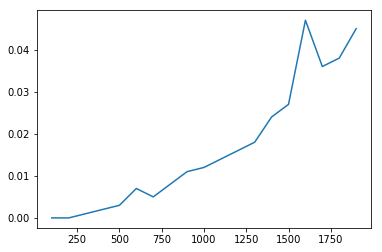

In [45]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

In [46]:
def findDisappearedNumbers2(nums):
    # For each number i in nums,
    # we mark the number that i points as negative.
    # Then we filter the list, get all the indexes
    # who points to a positive number
    for i in range(len(nums)):
        index = abs(nums[i]) - 1
        nums[index] = - abs(nums[index])

    return [i + 1 for i in range(len(nums)) if nums[i] > 0]

In [50]:
def hh(nums):
    for i in range(len(nums)):
        index= abs(nums[i])-1
        nums[index]= - abs(nums[index])
        
    return [i+1 for i in range(len(nums)) if nums[i]>0]


In [47]:
nums = [4,3,2,7,8,2,3,1]

print(findDisappearedNumbers2(nums))

[5, 6]


In [49]:
def findDisappearedNumbersTest2(nums):
    start = time.time()
    r = findDisappearedNumbers2(nums)
    t = time.time() - start
    return r, len(nums), t

In [50]:
random_lists = random_list(100)
rst = [findDisappearedNumbersTest2(l) for l in random_lists]
len(rst)
rst

[([], 100, 0.0),
 ([], 200, 0.0),
 ([], 300, 0.0),
 ([], 400, 0.0),
 ([], 500, 0.0),
 ([], 600, 0.0009999275207519531),
 ([], 700, 0.0),
 ([], 800, 0.0009999275207519531),
 ([], 900, 0.0),
 ([], 1000, 0.0010001659393310547),
 ([], 1100, 0.0),
 ([], 1200, 0.0009999275207519531),
 ([], 1300, 0.0009999275207519531),
 ([], 1400, 0.0),
 ([], 1500, 0.0009999275207519531),
 ([], 1600, 0.0009999275207519531),
 ([], 1700, 0.0010004043579101562),
 ([], 1800, 0.0009999275207519531),
 ([], 1900, 0.0009999275207519531)]

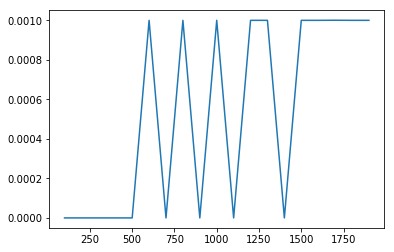

In [51]:
x = list(zip(*rst))[1]
y = list(zip(*rst))[2]

plt.plot(x, y)

### Ex10：Plus One

Given a non-negative integer represented as a non-empty array of digits, plus one to the integer.

You may assume the integer do not contain any leading zero, except the number 0 itself.

The digits are stored such that the most significant digit is at the head of the list.


In [92]:
def plusOne(digits):
    if len(digits)==0:
        return False
    addCarry=1
    for i in range(len(digits)-1,-1,-1):
        digits[i]+=addCarry
       
        if digits[i]==10:
            digits[i]=0
            if i==0:
                digits.insert(0,1)
        else:
            break
    return digits

In [93]:
digits = [1, 2, 3]
print(plusOne(digits))


[1, 2, 4]
